# TITANIC EDA PROJECT

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 



In [33]:
df=pd.read_csv(r"C:\Users\MY WORLD\.cache\kagglehub\datasets\yasserh\titanic-dataset\versions\1\Titanic-Dataset.csv") 
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Understanding the Dataset

In [34]:
df.shape
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Conclusion:

Dataset has 891 rows and 12 columns

Some columns contain missing values

Data includes both numerical and categorical features

# Handling Missing Values

In [38]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

## Fill missing Age with mean

In [39]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

C:\Users\MY WORLD\AppData\Local\Temp\ipykernel_18688\1698716155.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


## Fill missing Embarked with mode

In [37]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


C:\Users\MY WORLD\AppData\Local\Temp\ipykernel_18688\411043493.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


## Drop Cabin column (too many missing values)

In [40]:
df.drop(columns=['Cabin'], inplace=True)


Conclusion:
Missing data is handled properly, improving data quality and analysis accuracy.

# Survival Count

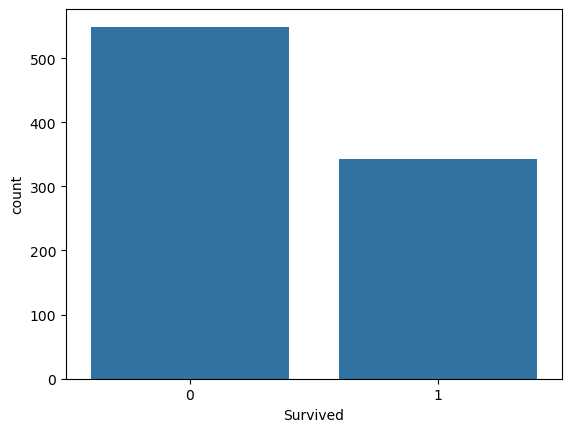

In [41]:
df['Survived'].value_counts()
sns.countplot(x='Survived', data=df)
plt.show()


Conclusion:
More passengers did not survive compared to those who survived.

## Survival by Gender

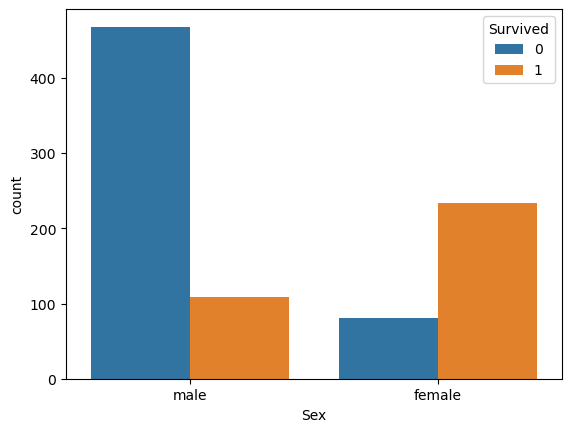

In [43]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.show()


Conclusion:
Females had a much higher survival rate than males.

## Survival by Passenger Class

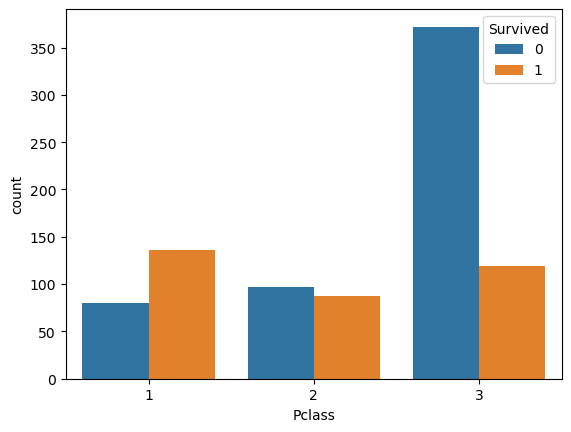

In [44]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.show()


Conclusion:
Passengers in 1st class survived more than those in 2nd and 3rd class.

## Age Distribution

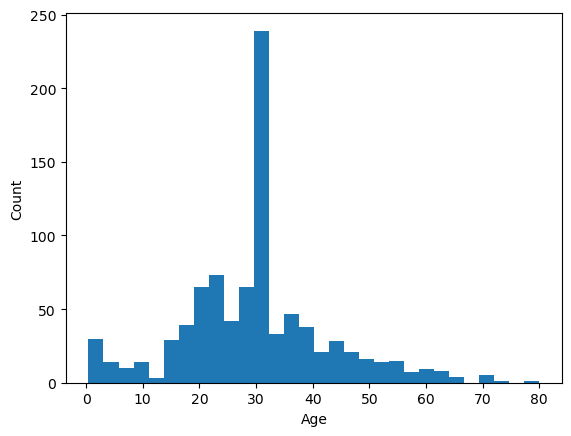

In [50]:
plt.hist(df['Age'], bins=30 )
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


Conclusion:
Most passengers were between 20–40 years old.

# Fare vs Survival

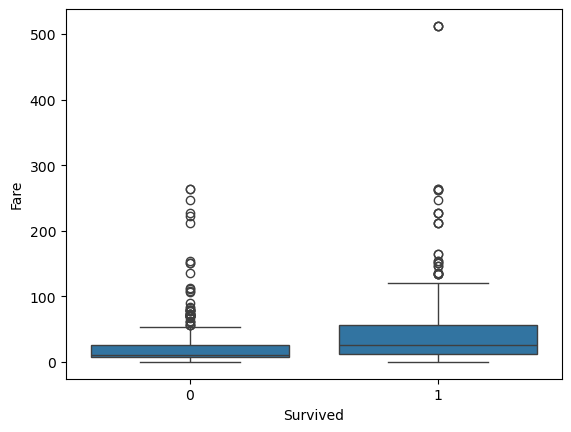

In [61]:
sns.boxplot(x='Survived', y='Fare', data=df)
plt.show()


Conclusion:
Passengers who paid higher fares had better survival chances.

## Changing data type for the following cols
Survived(category)
PClass(category)
Sex(category)
Age(int)
Embarked(category)

In [55]:
df['Survived']=df['Survived'].astype('category')
df['Pclass']=df['Pclass'].astype('category')
df['Sex']=df['Sex'].astype('category')
df['Age']=df['Age'].astype('int')
df['Embarked']=df['Embarked'].astype('category')

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    int64   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(4), float64(1), int64(4), object(2)
memory usage: 52.8+ KB


# Correlation Analysis

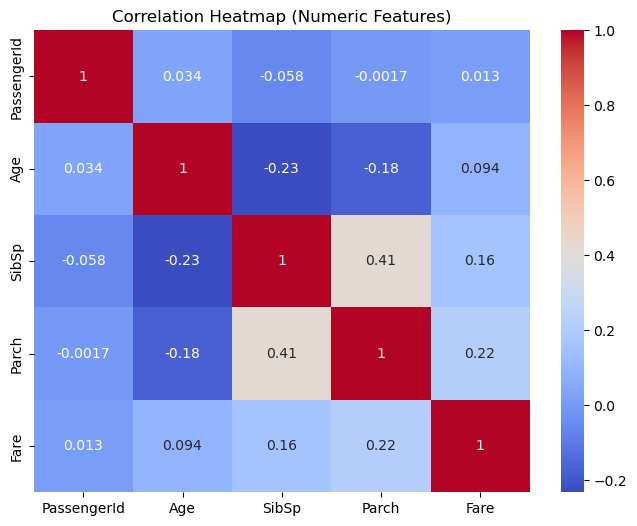

In [59]:
plt.figure(figsize=(8,6))

numeric_df = df.select_dtypes(include=['int64', 'float64'])

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


The correlation heatmap shows that survival is positively related to fare, meaning passengers who paid higher fares had better chances of survival. Age has a weak relationship with survival, while family-related features show very little impact. Overall, fare and passenger class are the most influential numerical factors affecting survival.

# Survival by Embarkation Port

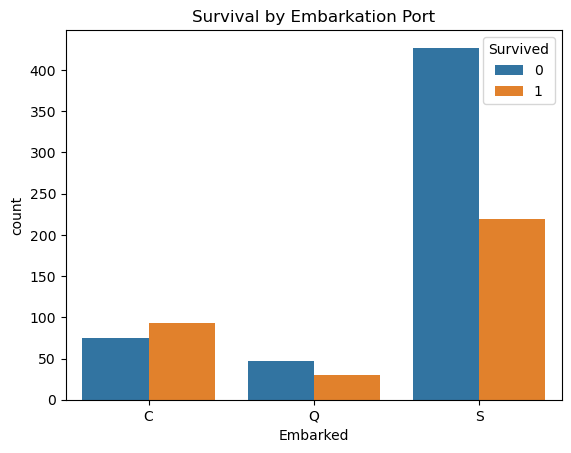

In [62]:
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title("Survival by Embarkation Port")
plt.show()


Why important:
Shows survival difference by boarding location.

Conclusion:
Passengers who boarded at Cherbourg (C) had higher survival.

# Age vs Survival (Box Plot)

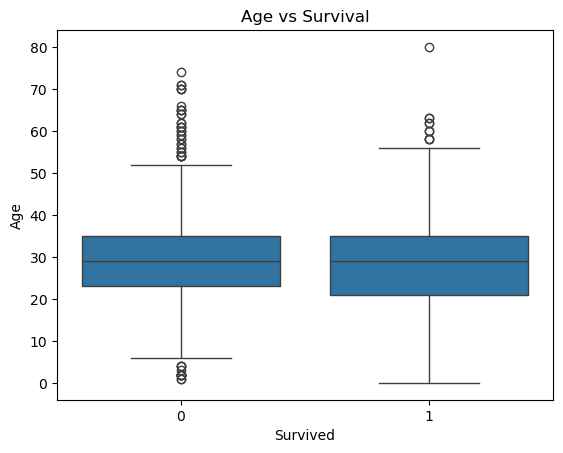

In [63]:
sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Age vs Survival")
plt.show()


 Survivors were generally slightly younger.

# Family Size Distribution

C:\Users\MY WORLD\AppData\Local\Temp\ipykernel_18688\3233139749.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='FamilySize', data=df,palette='rainbow')


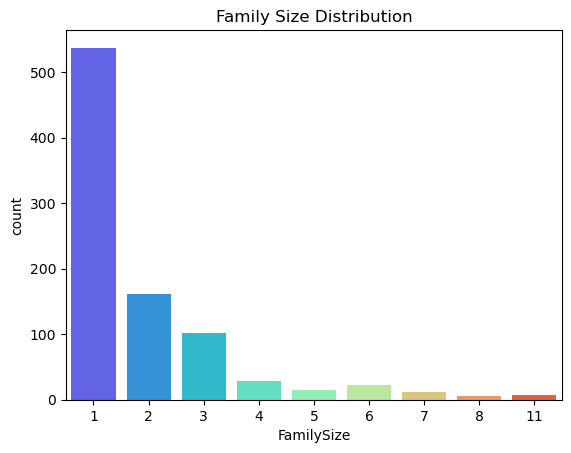

In [65]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

sns.countplot(x='FamilySize', data=df,palette='rainbow')
plt.title("Family Size Distribution")
plt.show()


Most passengers traveled alone or with small families.

# Survival by Family Size

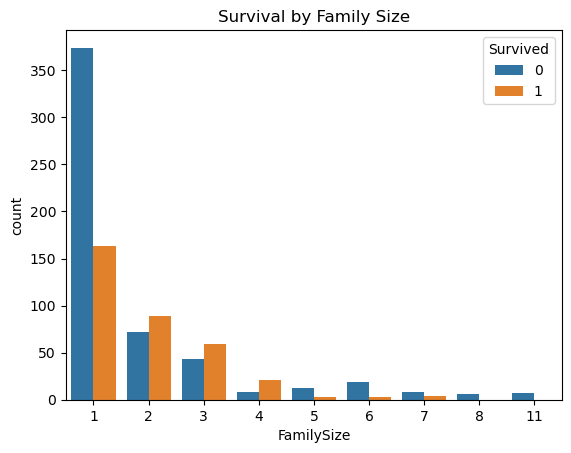

In [66]:
sns.countplot(x='FamilySize', hue='Survived', data=df)
plt.title("Survival by Family Size")
plt.show()


Passengers with small families survived more than those alone or with large families.

In [70]:
df['Ticket_Length'] = df['Fare'].astype(str).apply(len)


In [71]:
print(df.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'FamilySize', 'Ticket_Length'],
      dtype='object')


# Plot Survival vs Ticket Length

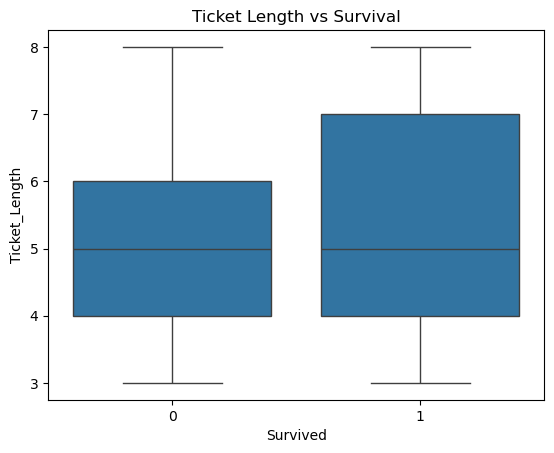

In [72]:
sns.boxplot(x='Survived', y='Ticket_Length', data=df)
plt.title("Ticket Length vs Survival")
plt.show()


Passengers with more complex ticket numbers showed slightly better survival trends.

# Distinct Ticket Count (Top 10 Tickets)

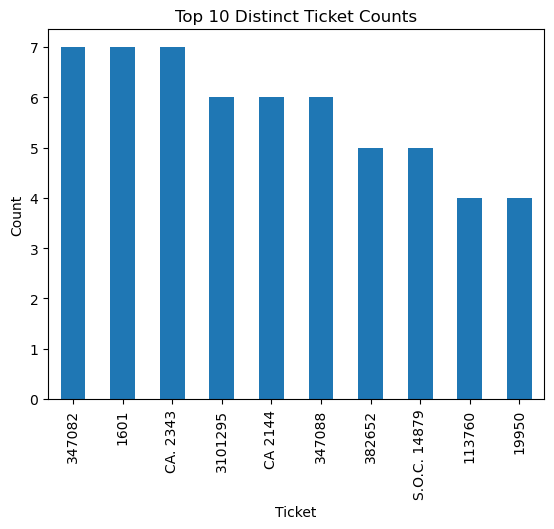

In [74]:
df['Ticket'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Distinct Ticket Counts")
plt.xlabel("Ticket")
plt.ylabel("Count")
plt.show()


# Conclusion:
This analysis of the Titanic dataset reveals key factors influencing passenger survival. Females and passengers in higher classes (especially 1st class) had significantly higher survival rates. Age and fare also played an important role, with children and higher-fare passengers more likely to survive. Passengers embarking from Cherbourg showed better survival outcomes compared to other ports. Family size impacted survival, where small families had better chances than solo or very large families. Overall, the visualizations and correlations highlight how socio-economic status and demographics strongly affected survival on the Titanic.